# Using sklearn's methods for Cross Validation and Grid Search

## Get the iris dataset
Download the dataset from sklearn's datasets module. The iris dataset is a simple dataset with 150 samples and 4 features. The target variable is the species of the iris flower. The dataset is a dictionary-like object that holds all the data and some metadata about the data. The data is stored in the `.data` member, which is a 2D numpy array. The rows are the samples and the columns are the features. The `.target` member is a 1D numpy array that contains the target variable. The target variable is the species of the iris flower. The species are encoded as integers from 0 to 2. The `.target_names` member is an array of strings that gives the species names.
```
from sklearn.datasets import load_iris
```

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


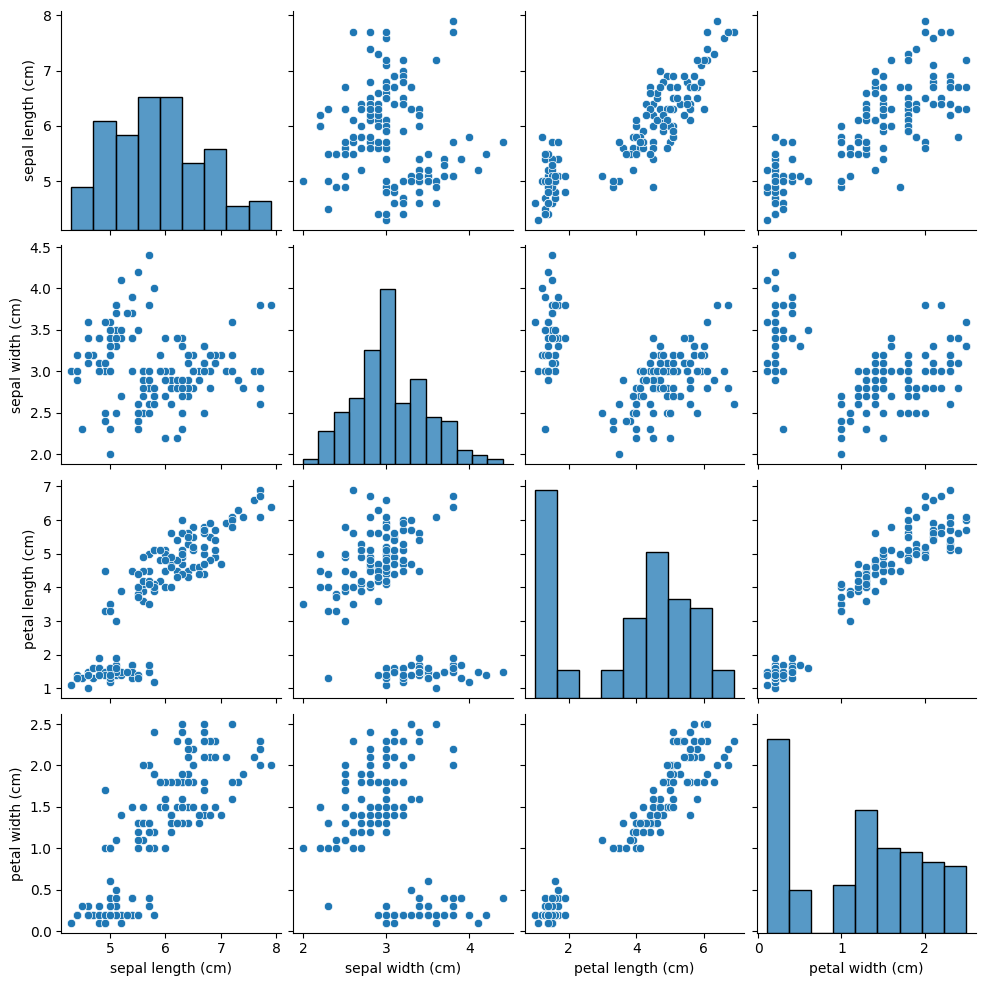

In [17]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

X, y = load_iris(return_X_y=True, as_frame=True)

print(X.head())
sns.pairplot(X)

## 1. Holdout Method
Keep track of the **accuracy** and the **f1-score** of the model on the test set.
Use both to evaluate the model. Decide the best parameters for the model based on either the accuracy or the f1-score. (best try  both, will the parameters be different?)
**For each iteration keep track of the scores and plot the results w.r.t. to the number of neighbors.**
### 1.1. Split the data into training and test sets
### 1.2. Use the knn classifier to classify the iris dataset
```python
from sklearn.neighbors import KNeighborsClassifier
```
### 1.3. There are two hyperparameters in the KNeighborsClassifier class that we can tune: the number of neighbors and the distance metric.
### 1.4. Use GridSearchCV to find the best hyperparameters for the model.
```python
from sklearn.model_selection import GridSearchCV
```

## 2. k-fold Cross Validation
### 2.1. Use k-fold cross validation to evaluate the model
Repeat the process of finding the best hyperparameters for the model using k-fold cross validation. Keep track of the **accuracy** and the **f1-score** of the model on the test set. Use both to evaluate the model. Decide the best parameters for the model based on either the accuracy or the f1-score. (best try  both, will the parameters be different?)
### 2.2. Check the results
- are the results different?
- how much do the validation scores vary?

# train = 120, # test = 30, # total = 150
Best paramethers:  {'metric': 'euclidean', 'n_neighbors': 3}
Best score:  0.9570860786959858


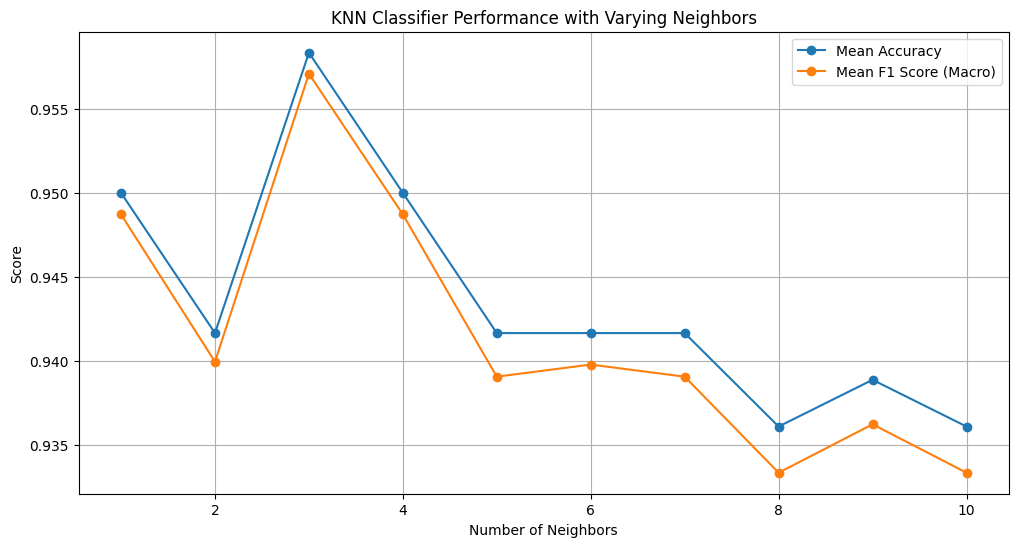

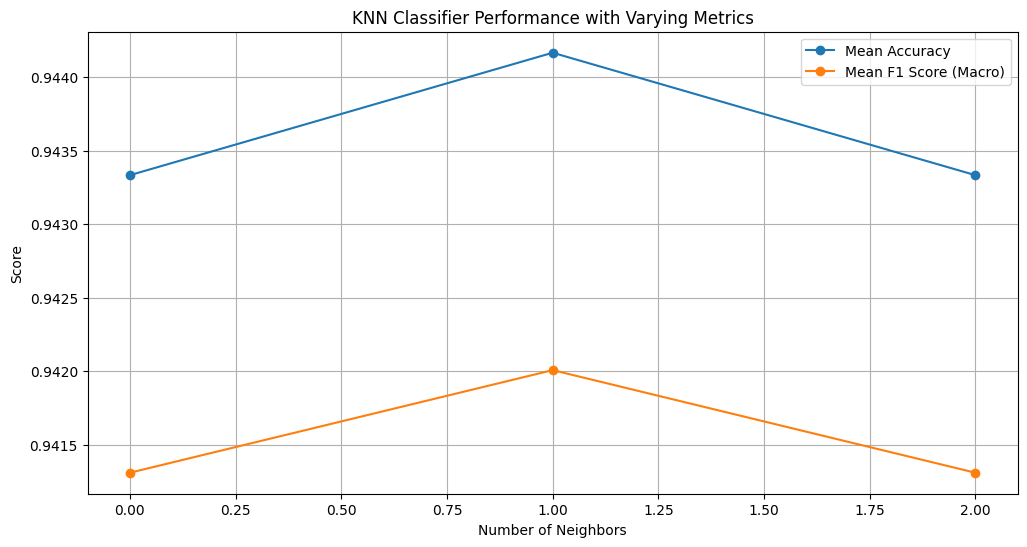

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer
import matplotlib.pyplot as plt


test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
print("# train = %d, # test = %d, # total = %d" %(len(X_train), len(X_test), len(X)))

model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(1, 11),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

scoring = {'accuracy': make_scorer(accuracy_score), 'f1_macro': make_scorer(f1_score, average='macro')}
grid_search = GridSearchCV(model, param_grid, scoring=scoring, return_train_score=True, refit="f1_macro", cv=5)
grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

best_params_accuracy = grid_search.best_params_
best_score_accuracy = grid_search.best_score_

print("Best paramethers: ", best_params_accuracy)
print("Best score: ", best_score_accuracy)

neighbors = param_grid['n_neighbors']
mean_accuracy_scores = []
mean_f1_scores = []
for k in neighbors:
    indices = np.where(results['param_n_neighbors'] == k)
    mean_accuracy_scores.append(np.mean(results['mean_test_accuracy'][indices]))
    mean_f1_scores.append(np.mean(results['mean_test_f1_macro'][indices]))


plt.figure(figsize=(12, 6))
plt.plot(neighbors, mean_accuracy_scores, marker='o', label='Mean Accuracy')
plt.plot(neighbors, mean_f1_scores, marker='o', label='Mean F1 Score (Macro)')
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("KNN Classifier Performance with Varying Neighbors")
plt.legend()
plt.grid(True)
plt.show()


metrics = param_grid['metric']
mean_accuracy_scores = []
mean_f1_scores = []
for m in metrics:
    indices = np.where(results['param_metric'] == m)
    mean_accuracy_scores.append(np.mean(results['mean_test_accuracy'][indices]))
    mean_f1_scores.append(np.mean(results['mean_test_f1_macro'][indices]))


plt.figure(figsize=(12, 6))
plt.plot(range(len(metrics)), mean_accuracy_scores, marker='o', label='Mean Accuracy')
plt.plot(range(len(metrics)), mean_f1_scores, marker='o', label='Mean F1 Score (Macro)')
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("KNN Classifier Performance with Varying Metrics")
plt.legend()
plt.grid(True)
plt.show()



# 3 Evaluate the classifier down there by hand!
Calculate accuarcy, precision, recall and f1-score for the best model you found.
Use `micro`, `macro` and `weighted` averaging for the multiclass classification.


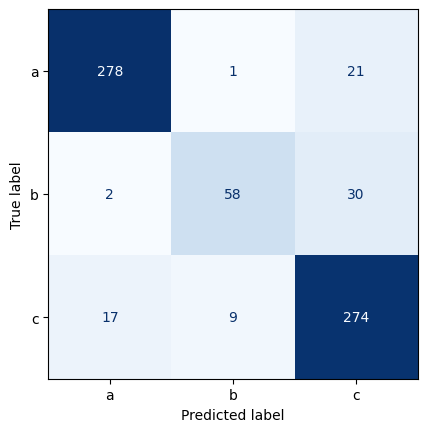

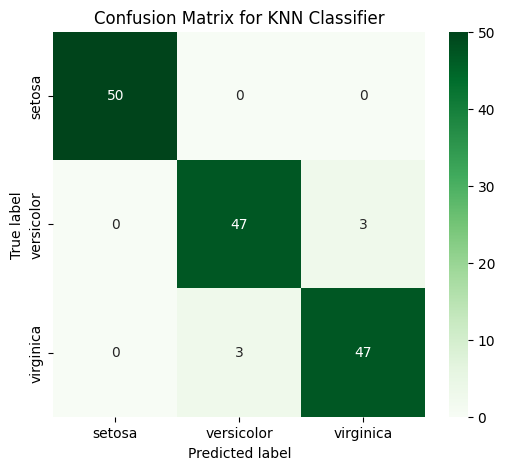

In [19]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X)

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 5))
targets = load_iris().target_names
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=targets, yticklabels=targets)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()



In [20]:
all_number = sum([sum(cm[:, 0]), sum(cm[:, 1]), sum(cm[:, 2])])
print(f'\nAccuracy: {sum([cm[0][0], cm[1][1], cm[2][2]])/sum([sum(cm[0]), sum(cm[1]), sum(cm[2])])}')

recall_setosa = cm[0][0]/sum(cm[0])
recall_versicolor = cm[1][1]/sum(cm[1])
recall_virginica = cm[2][2]/sum(cm[2])
macro_r = sum([recall_setosa, recall_versicolor, recall_virginica])/3
micro_r = sum([cm[0][0], cm[1][1], cm[2][2]]) / sum([sum(cm[0]), sum(cm[1]), sum(cm[2])])
print(f'\nRecall: \nSetosa: {recall_setosa}\nVersicolor: {recall_versicolor}\nVirginica: {recall_virginica}')
print(f"Macro: {macro_r}")
print(f"Micro: {micro_r}")
print(f"Weighted: {sum([ (sum(cm[0])/all_number)*recall_setosa, (sum(cm[1])/all_number)*recall_versicolor, (sum(cm[2])/all_number)*recall_virginica])}")

precision_setosa = cm[0][0]/sum(cm[:, 0])
precision_versicolor = cm[1][1]/sum(cm[:, 1])
precision_virginica = cm[2][2]/sum(cm[:, 2])
macro_p = sum([precision_setosa, precision_versicolor, precision_virginica])/3
micro_p = sum([cm[0][0], cm[1][1], cm[2][2]]) / sum([sum(cm[:, 0]), sum(cm[:, 1]), sum(cm[:, 2])])
print(f'\nPrecision: \nSetosa: {precision_setosa}\nVersicolor: {precision_versicolor}\nVirginica: {precision_virginica}')
print(f"Macro: {macro_p}")
print(f"Micro: {micro_p}")
print(f"Weighted: {sum([ (sum(cm[0])/all_number)*precision_setosa, (sum(cm[1])/all_number)*precision_versicolor, (sum(cm[2])/all_number)*precision_virginica])}")

f1_setosa = 2*(recall_setosa*precision_setosa)/(recall_setosa+precision_setosa)
f1_versicolor = 2*(recall_versicolor*precision_versicolor)/(recall_versicolor+precision_versicolor)
f1_virginica = 2*(recall_virginica*precision_virginica)/(recall_virginica+precision_virginica)
print(f'\nF1: \nSetosa: {precision_setosa}\nVersicolor: {precision_versicolor}\nVirginica: {precision_virginica}')
print(f"Macro: {sum([f1_setosa, f1_versicolor, f1_virginica])/3}")
print(f"Micro: {2*(micro_r*micro_p)/(micro_r+micro_p)}")
print(f"Weighted: {sum([ (sum(cm[0])/all_number)*f1_setosa, (sum(cm[1])/all_number)*f1_versicolor, (sum(cm[2])/all_number)*f1_virginica])}")




Accuracy: 0.96

Recall: 
Setosa: 1.0
Versicolor: 0.94
Virginica: 0.94
Macro: 0.96
Micro: 0.96
Weighted: 0.96

Precision: 
Setosa: 1.0
Versicolor: 0.94
Virginica: 0.94
Macro: 0.96
Micro: 0.96
Weighted: 0.96

F1: 
Setosa: 1.0
Versicolor: 0.94
Virginica: 0.94
Macro: 0.96
Micro: 0.96
Weighted: 0.96
